# Deciding University Admissions

In [8]:
import _plotting

import matplotlib.pyplot as plt
import pandas
import numpy
import sklearn.tree
numpy.random.seed(0)


def process_admissions(dataframe):

    column_admitted_chance = 'Chance of Admit'
    column_admitted = 'Admitted'
    columns_drop = [column_admitted_chance]

    dataframe_p = dataframe.copy()
    dataframe_p[column_admitted] = dataframe[column_admitted_chance] >= 0.75
    dataframe_p = dataframe_p.drop(columns = columns_drop)

    return dataframe_p

raw_admissions = pandas.read_csv('../../../datasets/raw/Admission_Predict.csv', index_col=0)
data = process_admissions(raw_admissions)

features = data.drop(columns = ['Admitted'])
columns_features = features.columns
features = features.values

labels = data['Admitted'].values


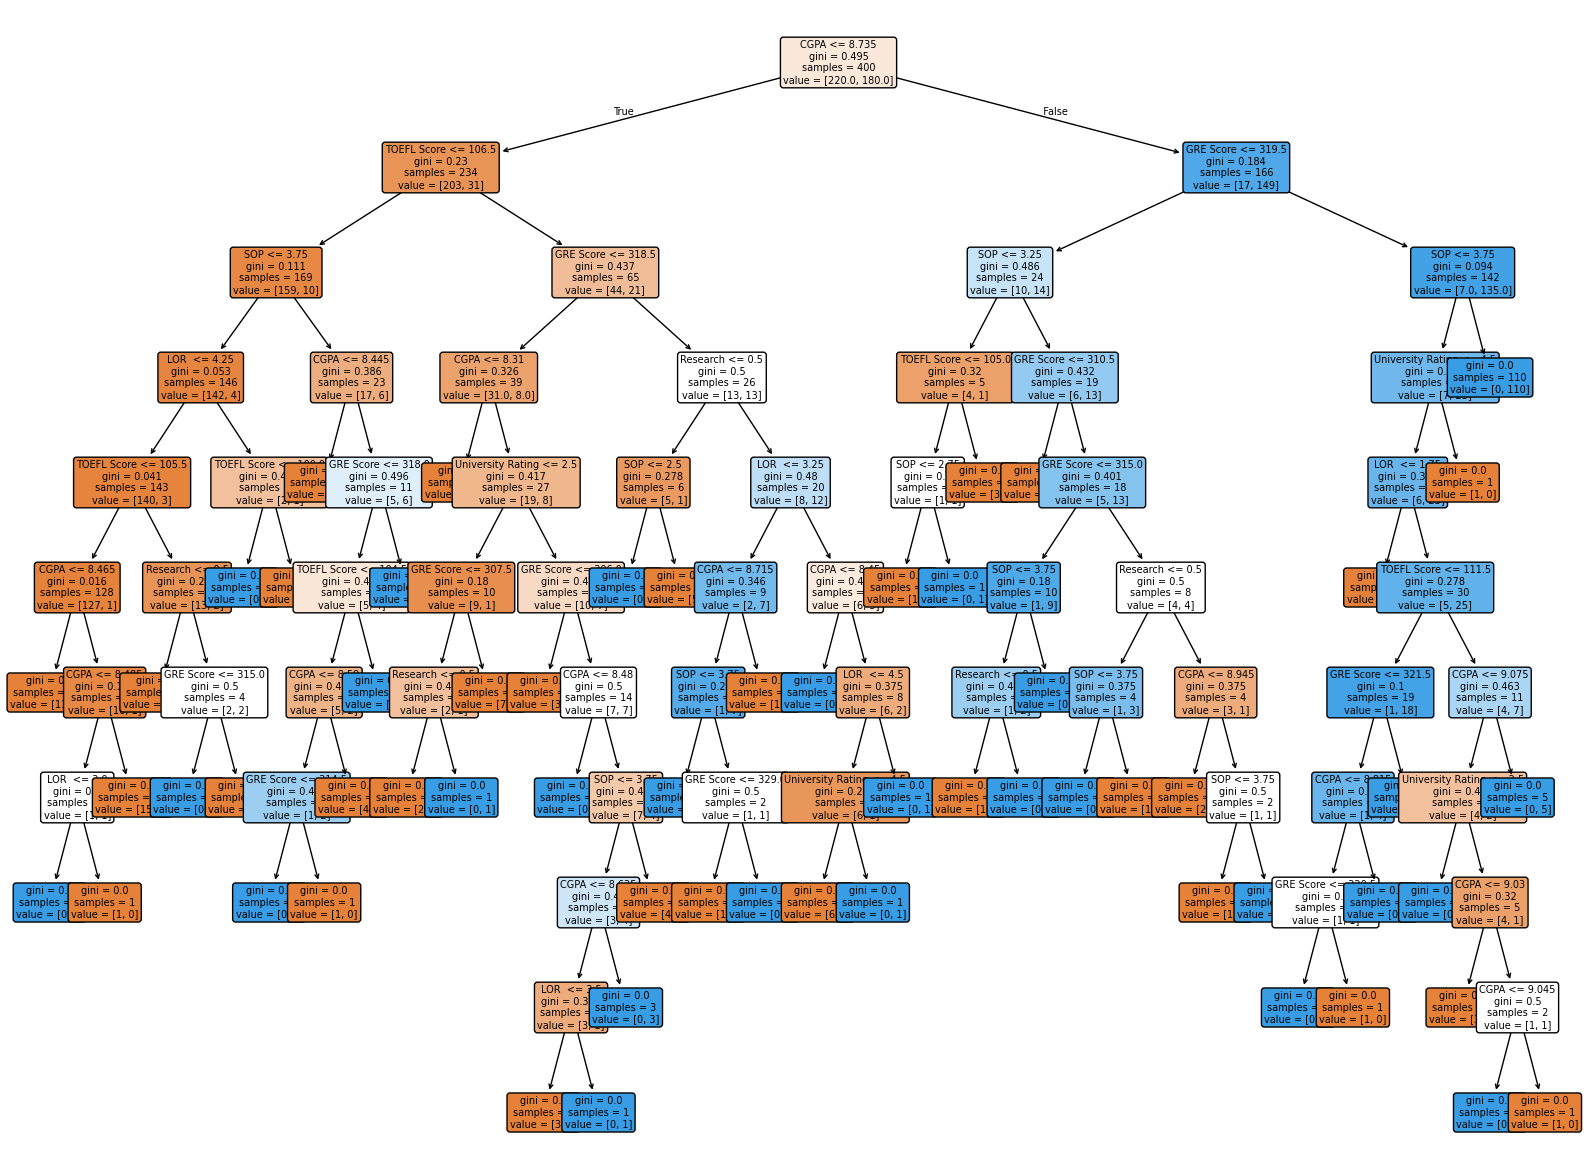

In [11]:
# Training a decision trees
model_admissions = sklearn.tree.DecisionTreeClassifier()
model_admissions.fit(features, labels)
model_admissions.score(features, labels)

fig = plt.figure(figsize=(20,15))
sklearn.tree.plot_tree(model_admissions, feature_names=columns_features, filled=True, rounded=True, fontsize=7)
plt.show()

## Hyperparameters

- max_depth: the maximum allowed depth.
- max_features: the maximum number of features considered at each split (useful for when there are too many features, and the training process takes too long).
- min_impurity_decrease: the decrease in impurity must be higher than this threshold to split a node.
- min_impurity_split: when the impurity at a node is lower than this threshold, the node becomes a leaf.
- min_samples_leaf: the minimum number of samples required for a leaf node. If a split leaves a leaf with less than this number of samples, the split is not performed.
- min_samples_split: the minimum number of samples required to split a node.

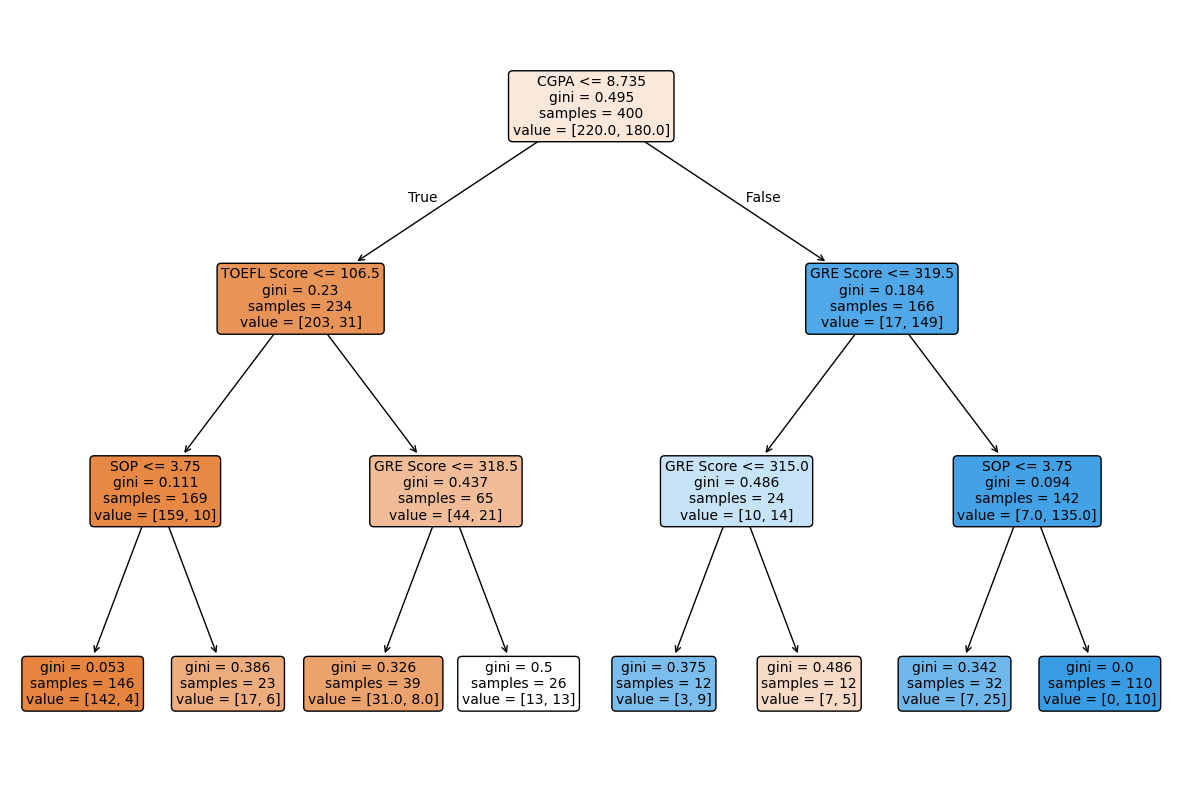

In [ ]:
# All simpler

all_simpler = { "max_depth": 3, "min_samples_leaf" : 10, "min_samples_split" : 10 }


model_exams = sklearn.tree.DecisionTreeClassifier(**all_simpler)
model_exams.fit(features, labels)
model_exams.score(features, labels)

fig = plt.figure(figsize=(15,10))
sklearn.tree.plot_tree(model_exams, feature_names=columns_features, filled=True, rounded=True, fontsize=10)
plt.show()

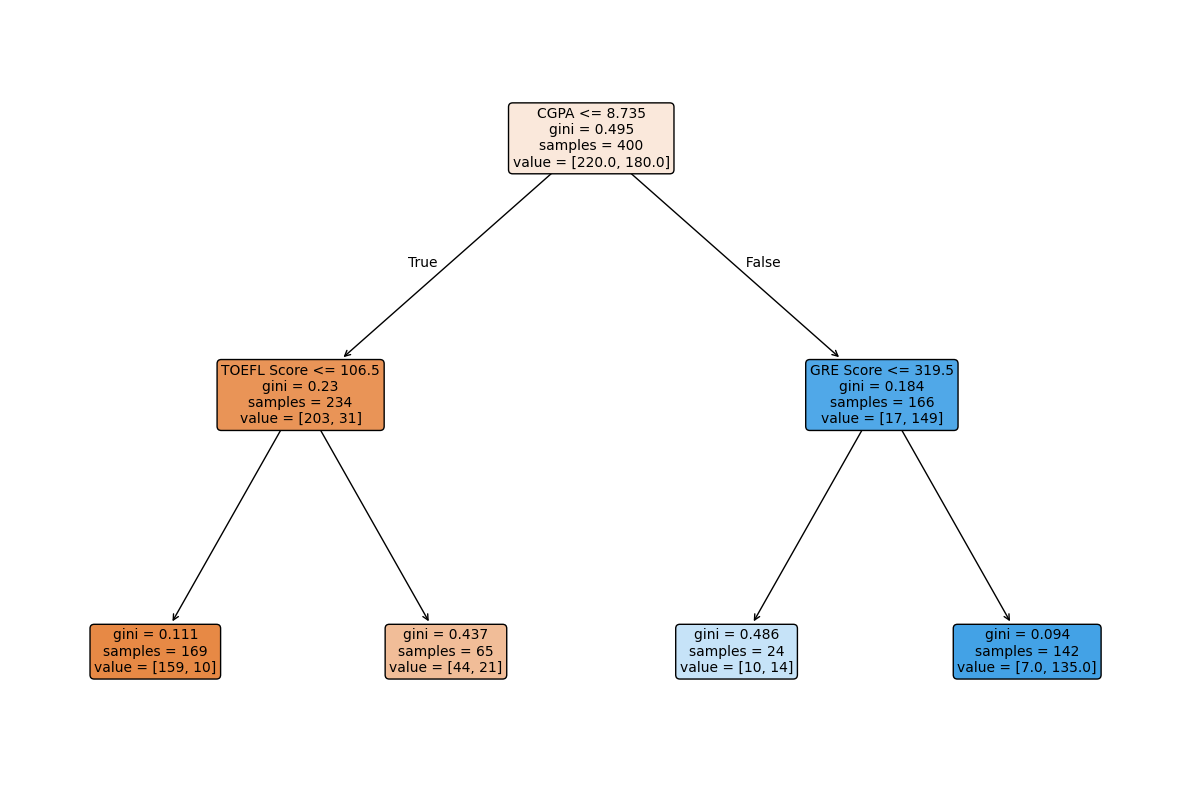

In [18]:
# All simpler

exams = { "max_depth": 2, "min_samples_leaf" : 10, "min_samples_split" : 10 }

dict_params = {
    "all_simpler" : { "max_depth": 3, "min_samples_leaf" : 10, "min_samples_split" : 10 },
    "exams" :  { "max_depth": 2 }, # "min_samples_leaf" : 10, "min_samples_split" : 10 },
    "exams_simpler" : { "max_depth": 1 },
}

model_exams = sklearn.tree.DecisionTreeClassifier(**exams)
model_exams.fit(features, labels)
model_exams.score(features, labels)

fig = plt.figure(figsize=(15,10))
sklearn.tree.plot_tree(model_exams, feature_names=columns_features, filled=True, rounded=True, fontsize=10)
plt.show()

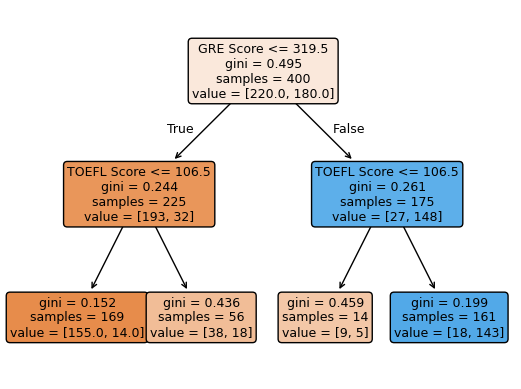

In [19]:
# Training a decision tree with only two features

columns_exams = ['GRE Score', 'TOEFL Score']
# columns_exams = ['GRE Score', 'CGPA']

features_exams = data[columns_exams].values

# Plot the exam set
_plotting.plot_scatter(features_exams[labels == 0, 0], features_exams[labels == 0, 1], marker = 's')
_plotting.plot_scatter(features_exams[labels == 1, 0], features_exams[labels == 1, 1], marker = '^')
plt.legend(["GRE", "TOEFL"]) # not sure


model_admission_via_exams = sklearn.tree.DecisionTreeClassifier(**dict_params["exams"])
model_admission_via_exams.fit(features_exams, labels)

sklearn.tree.plot_tree(model_admission_via_exams, feature_names=columns_exams, filled=True, rounded=True, fontsize=9)
plt.show()

c:\Users\luis.bolanoss\Documents\Labs\repositories\supervised-machine-learning\notebooks\models\decision_trees\_plotting.py:53: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(


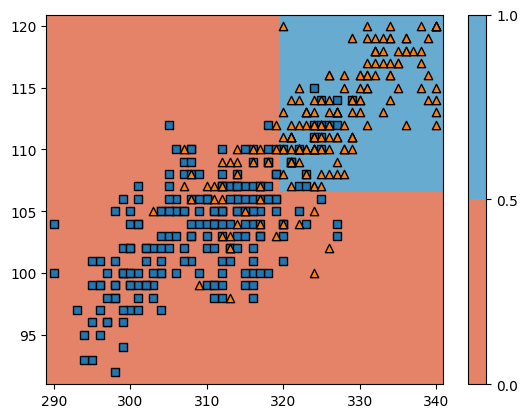

In [20]:
_plotting.plot_decision_boundary_2D(features_exams, labels, model_admission_via_exams) # 25 size
